# Demonstration of `pdfplumber`'s `extract_table` method.

This notebook uses `pdfplumber` to extract data from an [California Worker Adjustment and Retraining Notification (WARN) report](../pdfs/ca-warn-report.pdf).

### Import `pdfplumber`

In [1]:
import pdfplumber
print(pdfplumber.__version__)

0.10.2


### Load the PDF

In [3]:
pdf = pdfplumber.open("test_files/BIN2305.pdf")

### Get the first page

In [4]:
p0 = pdf.pages[0]

### Display the first page

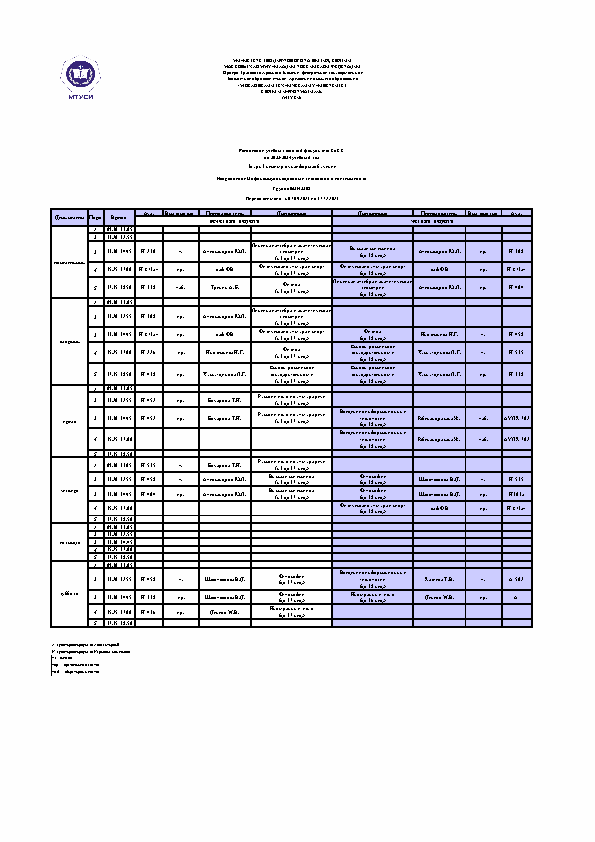

In [28]:
im = p0.crop(()).to_image()
im

### Use `.extract_table` to get the data from the largest table on the page

In [48]:
table = p0.extract_table(table_settings={
    "vertical_strategy": "lines", 
    "horizontal_strategy": "lines",
    "explicit_vertical_lines": [],
    "explicit_horizontal_lines": [],
    "snap_tolerance": 3,
    "snap_x_tolerance": 3,
    "snap_y_tolerance": 3,
    "join_tolerance": 3,
    "join_x_tolerance": 3,
    "join_y_tolerance": 3,
    "edge_min_length": 3,
    "min_words_vertical": 3,
    "min_words_horizontal": 1,
    "text_tolerance": 3,
    "text_x_tolerance": 3,
    "text_y_tolerance": 3,
    "intersection_tolerance": 3,
    "intersection_x_tolerance": 3,
    "intersection_y_tolerance": 3,
})

`.extract_table` returns a list of lists, with each inner list representing a row in the table. Here are the first three rows:

In [49]:
table[4]

[None,
 '3',
 '13.10-14.45',
 'Н-230',
 'л.',
 'Александров Ю.Л.',
 'Линейная алгебра и аналитическая\nгеометрия\n(с 3 до 17 нед.)',
 'Высшая математика\n(до 18 нед.)',
 'Александров Ю.Л.',
 'пр.',
 'Н-308']

In [ ]:
table.to_csv()

## Basic cleanup

We can use `pandas` to render the list as a DataFrame, and to remove the extra spaces within some of the dates.

In [9]:
import pandas as pd

In [11]:
df = pd.DataFrame(table[1:], columns=table[0])
# for column in ["Effective", "Received"]:
#     df[column] = df[column].str.replace(" ", "")

In [12]:
df

,,,,Ауд.,Вид занятия,Преподаватель,Дисциплина,Дисциплина,Преподаватель,Вид занятия,Ауд.
0,День недели,Пара,Время,нечетная неделя,None,None,None,четная неделя,None,None,None
1,понедельник,1,09.30-11.05,,,,,,,,
2,None,2,11.20-12.55,,,,,,,,
3,None,3,13.10-14.45,Н-230,л.,Александров Ю.Л.,Линейная алгебра и аналитическая\nгеометрия\n(...,Высшая математика\n(до 18 нед.),Александров Ю.Л.,пр.,Н-308
4,None,4,15.25-17.00,Н-С/Зал,пр.,каф ФВ,Физическая культура и спорт\n(с 3 до 17 нед.),Физическая культура и спорт\n(до 18 нед.),каф ФВ,пр.,Н-С/Зал
5,None,5,17.15-18.50,Н-338,лаб.,Тренин А.Е.,Физика\n(с 3 до 17 нед.),Линейная алгебра и аналитическая\nгеометрия\n(...,Александров Ю.Л.,пр.,Н-404
6,вторник,1,09.30-11.05,,,,,,,,
7,None,2,11.20-12.55,Н-308,пр.,Александров Ю.Л.,Линейная алгебра и аналитическая\nгеометрия\n(...,,,,
8,None,3,13.10-14.45,Н-С/Зал,пр.,каф ФВ,Физическая культура и спорт\n(с 3 до 17 нед.),Физика\n(до 18 нед.),Иноземцева Н.Г.,л.,Н-458
9,None,4,15.25-17.00,Н-226,пр.,Иноземцева Н.Г.,Физика\n(с 3 до 17 нед.),Основы российской\nгосударственности\n(до 18 н...,Хуснутдинова Л.Г.,л.,Н-535


## How did it work?

We can use `pdfplumber`'s visual debugging to show how the table was extracted. The red lines represent the lines `pdfplumber` found on the page; the blue circles represent the intersections of those lines, and the light-blue shading indicates the cells derived from those intersections.

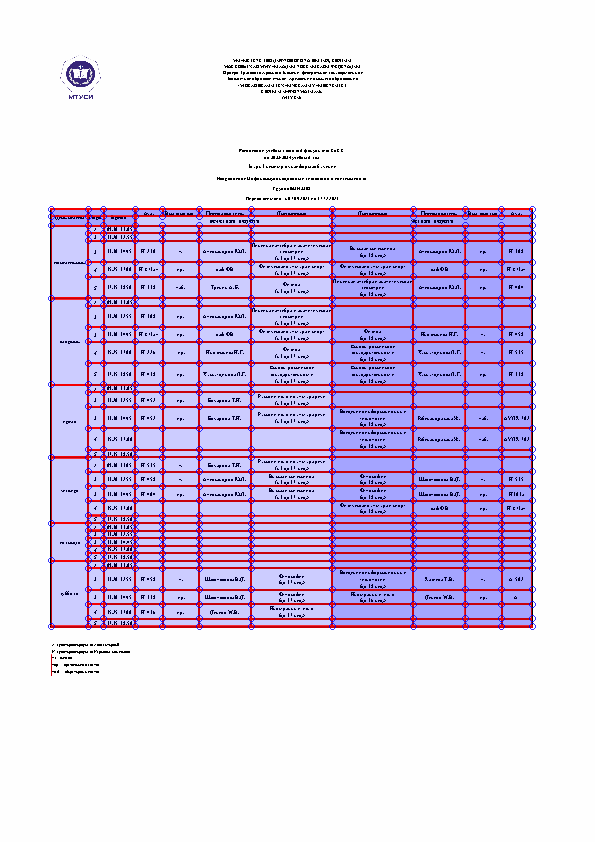

In [45]:
im.debug_tablefinder()

---

---

---